In [ ]:
import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalMaxPooling2D
from keras.models import Model

In [0]:
base_model = VGG16(weights='imagenet', input_shape = (256,256,3), include_top = False)

In [0]:
base_out = base_model.output

In [0]:
feat_layer = GlobalMaxPooling2D()(base_out)

In [8]:
model = Model(input = base_model.input, output = feat_layer)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("gl...)`
  """Entry point for launching an IPython kernel.


In [9]:
!pip3 install kaggle

In [0]:
import os

user = 'qiaohe'
key = '6992d820d95bfc00100fdab824b8ccbb'
 
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c humpback-whale-identification

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip train

Archive:  train.zip
replace 1cb7e70be.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 85fbaaeee.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 0df6c0ada.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 0df6c0ada.jpg           
  inflating: b45879784.jpg           
  inflating: 667c90122.jpg           
  inflating: d78425146.jpg           
  inflating: 52fb69ef4.jpg           
  inflating: e6b70421a.jpg           
  inflating: 57c35256c.jpg           
  inflating: fdda50025.jpg           
  inflating: b642373be.jpg           
  inflating: 38d49de1f.jpg           
  inflating: e0bc48ac2.jpg           
  inflating: 4e2cf9e48.jpg           
  inflating: 5c5e91098.jpg           
  inflating: d6a6539af.jpg           
  inflating: d102de015.jpg           
  inflating: 3308c3a19.jpg           
  inflating: dfbcd5e5b.jpg           
  inflating: b5bf598c6.jpg           
  inflating: 665c7dade.jpg           
  inflating: 1a9116d41.jpg           
  inflating: 2b4a4e5f7.jpg     

(587, 1014, 3)


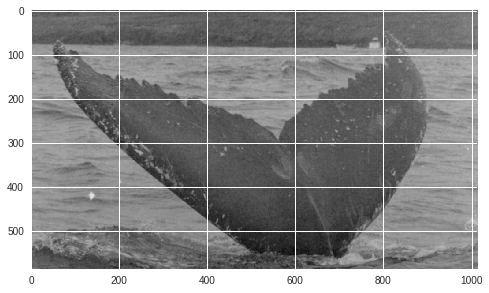

In [11]:
img = cv2.imread('ffc946e11.jpg')
print(img.shape)
plt.imshow(img[...,[2,1,0]])

In [0]:
resized_img = cv2.resize(img, (256,256))

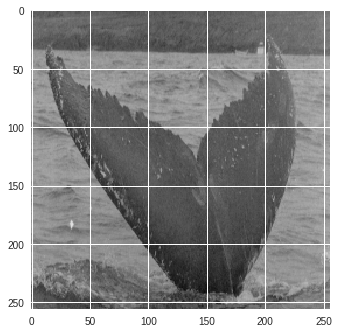

In [13]:
plt.imshow(resized_img[...,[2,1,0]])

In [0]:
feat1 = model.predict(np.expand_dims(resized_img,0))

In [0]:
feat1.shape

(1, 512)

[Начать отсюда](https://youtu.be/OM3Jdycznnc?t=7741)

---



In [0]:
def extract_features(path):
  img = cv2.imread(path)
  resized_img = cv2.resize(img, (256,256))
  model.predict(np.expand(resized_img, 0))

In [0]:
f1 = extract_features()
f2 = extract_features()